In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


Load California Housing Dataset

In [2]:
# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y

print("Dataset shape:", X.shape)
print("\nFeature names:", feature_names)
print("\nFirst few rows of the dataset:")
df.head()

Dataset shape: (20640, 8)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First few rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Basic statistics
print("Dataset statistical Summary:")
df.describe()

Dataset statistical Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


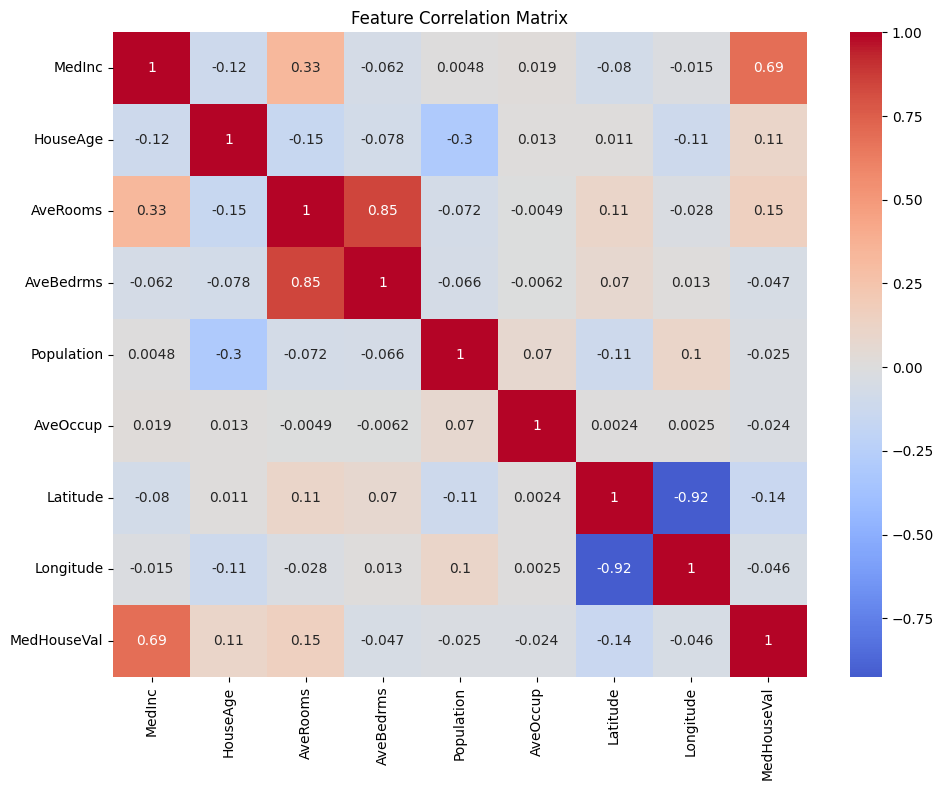

In [4]:
# Check for correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (16512, 8)
Testing set size: (4128, 8)


In [6]:
# Create and train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {linear_mse:.4f}")
print(f"R² Score: {linear_r2:.4f}")

Linear Regression Results:
Mean Squared Error: 0.5559
R² Score: 0.5758


In [7]:
# Create polynomial regression pipeline
poly_degree = 2  # We'll start with degree 2

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=poly_degree)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

# Train the polynomial model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Results (Degree 2):")
print(f"Mean Squared Error: {poly_mse:.4f}")
print(f"R² Score: {poly_r2:.4f}")

Polynomial Regression Results (Degree 2):
Mean Squared Error: 0.4643
R² Score: 0.6457


In [8]:
# Compare performance
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)'],
    'MSE': [linear_mse, poly_mse],
    'R²': [linear_r2, poly_r2]
})

print("Model Comparison:")
comparison

Model Comparison:


,Model,MSE,R²
0,Linear Regression,0.555892,0.575788
1,Polynomial Regression (Degree 2),0.464302,0.645682


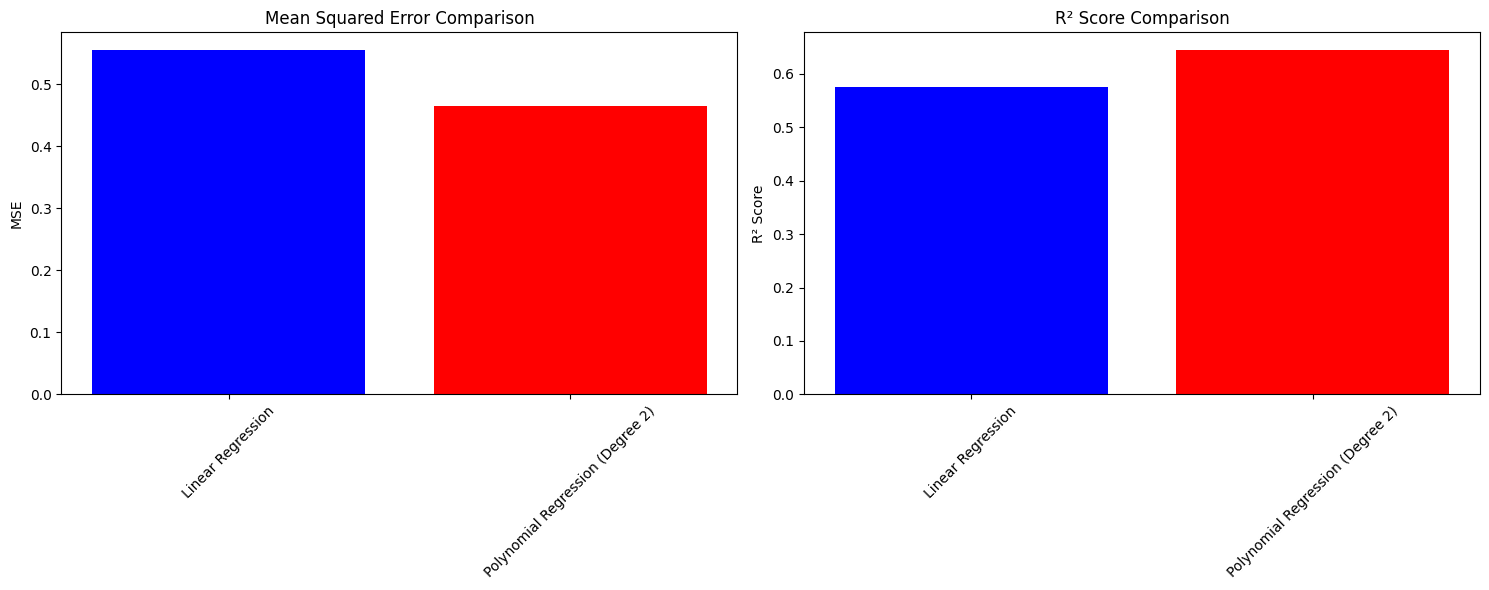

In [9]:
# Visual comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MSE comparison
ax[0].bar(comparison['Model'], comparison['MSE'], color=['blue', 'red'])
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=45)

# R² comparison
ax[1].bar(comparison['Model'], comparison['R²'], color=['blue', 'red'])
ax[1].set_title('R² Score Comparison')
ax[1].set_ylabel('R² Score')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [10]:
# Experiment with different polynomial degrees
degrees = [1, 2, 3, 4]
results = []

for degree in degrees:
    if degree == 1:
        # Linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Polynomial regression
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('scaler', StandardScaler()),
            ('linear', LinearRegression())
        ])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Degree': degree, 'MSE': mse, 'R²': r2})

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Performance across different polynomial degrees:")
results_df

Performance across different polynomial degrees:


,Degree,MSE,R²
0,1,0.555892,0.575788
1,2,0.464302,0.645682
2,3,25.407137,-18.388708
3,4,15039.700321,-11476.104149


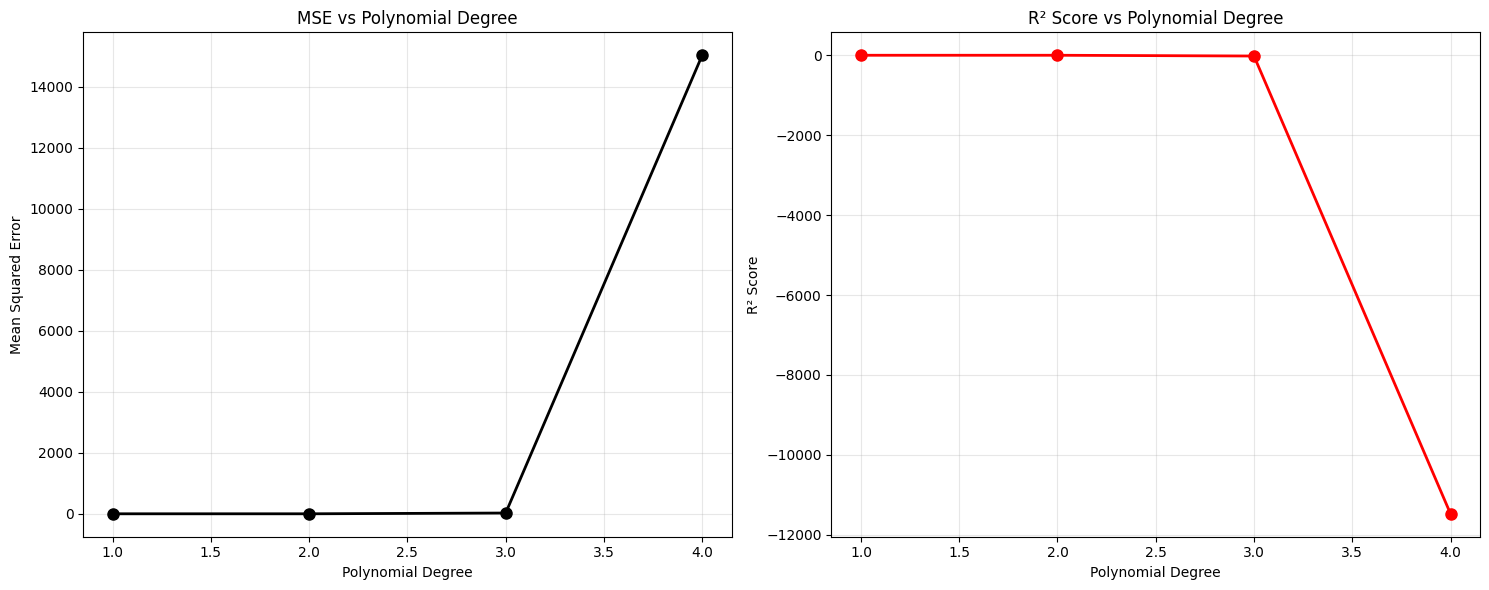

In [11]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MSE plot
ax[0].plot(results_df['Degree'], results_df['MSE'], marker='o', linewidth=2, markersize=8, color='black')
ax[0].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('MSE vs Polynomial Degree')
ax[0].grid(True, alpha=0.3)

# R² plot
ax[1].plot(results_df['Degree'], results_df['R²'], marker='o', linewidth=2, markersize=8, color='red')
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('R² Score')
ax[1].set_title('R² Score vs Polynomial Degree')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Final comparison
best_degree = results_df.loc[results_df['R²'].idxmax(), 'Degree']
best_r2 = results_df.loc[results_df['R²'].idxmax(), 'R²']

print(f"Best performing model: Polynomial Regression (Degree {int(best_degree)})")
print(f"Best R² score: {best_r2:.4f}")
print(f"Improvement over linear regression: {(best_r2 - linear_r2)*100:.2f}%")

Best performing model: Polynomial Regression (Degree 2)
Best R² score: 0.6457
Improvement over linear regression: 6.99%
